<a href="https://colab.research.google.com/github/ameyadalvi84/Keras/blob/master/MNIST_dataset_in_Karas_with_K_fold_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K Fold Cross Validation for MNIST dataset in Keras

In [0]:
import keras as K
from keras import models
from keras import layers
from keras.datasets import mnist
import numpy as np

Loading the MNIST data set and basic analysis

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print("Shape of Train data : ",train_images.shape)
print("Shape of Test data : ",test_images.shape)
print("Max value in train_images : ",train_images.max())
print("Min value in train_images : ",train_images.min())

11493376/11490434 [==============================] - 2s 0us/step
Shape of Train data :  (60000, 28, 28)
Shape of Test data :  (10000, 28, 28)
Max value in train_images :  255
Min value in train_images :  0


Plotting the data

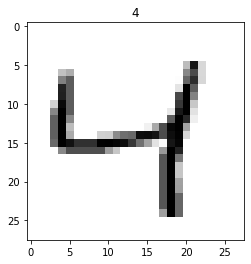

In [3]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
random.seed(1234)

indx = np.random.randint(0,10)
data = train_images[indx]
plt.imshow(data, cmap = plt.cm.binary)
plt.title(train_labels[indx])
plt.show()

Converting labels to vectors and normalizing the data for images

In [4]:
from keras.utils import to_categorical

train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

train_images_reshape = train_images.reshape((train_images.shape[0],train_images.shape[1]*train_images.shape[2]))
train_images_reshape = train_images_reshape.astype('float32') / train_images.max()

test_images_reshape = test_images.reshape((test_images.shape[0],test_images.shape[1]*test_images.shape[2]))
test_images_reshape = test_images_reshape.astype('float32') / train_images.max()

print("Value of train label[",indx,"] is :",train_labels[indx])
print("Value of train label[",indx,"] is :",train_labels_categorical[indx])

Value of train label[ 2 ] is : 4
Value of train label[ 2 ] is : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Building Model

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32,activation='relu', input_shape=(28*28,)))
  model.add(layers.Dense(16,activation='relu'))
  model.add(layers.Dense(10,activation = 'softmax'))
  model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model

Creating the K-Folds for our data

In [14]:
k = 6
num_val_samples = len(train_images_reshape)//k
num_epochs = 20
val_scores = []

for i in range(k):
  print("processing fold # ", i)
  val_images = train_images_reshape[i*num_val_samples:(i+1)*num_val_samples]
  val_labels = train_labels_categorical[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_images = np.concatenate([train_images_reshape[(i+1)*num_val_samples:] , train_images_reshape[:i* num_val_samples]])
  partial_train_labels = np.concatenate([train_labels_categorical[(i+1)*num_val_samples:] , train_labels_categorical[:i* num_val_samples]])
  model = build_model()
  model.fit(partial_train_images,partial_train_labels,epochs=num_epochs, batch_size = 128, verbose=0)
  val_loss, val_accuracy = model.evaluate(val_images,val_labels, verbose=1)
  val_scores.append(val_accuracy)

#val_scores
np.mean(val_scores)

processing fold #  0
10000/10000 [==============================] - 1s 56us/step
processing fold #  1
10000/10000 [==============================] - 0s 46us/step
processing fold #  2
10000/10000 [==============================] - 1s 54us/step
processing fold #  3
10000/10000 [==============================] - 0s 47us/step
processing fold #  4
10000/10000 [==============================] - 0s 49us/step
processing fold #  5
10000/10000 [==============================] - 0s 47us/step


0.960666666428248

In [15]:
print(val_scores)

[0.9641000032424927, 0.9610000252723694, 0.9585000276565552, 0.957099974155426, 0.958299994468689, 0.9649999737739563]


Plotting the validation accuracy

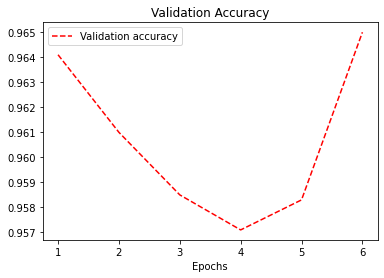

In [18]:
epoch = range(1,len(val_scores) + 1)
plt.plot(epoch,val_scores,'r--',label='Validation accuracy')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [19]:
k=4
val_scores = []
for i in range(k):
  print("processing fold # ", i)
  val_images = train_images_reshape[i*num_val_samples:(i+1)*num_val_samples]
  val_labels = train_labels_categorical[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_images = np.concatenate([train_images_reshape[(i+1)*num_val_samples:] , train_images_reshape[:i* num_val_samples]])
  partial_train_labels = np.concatenate([train_labels_categorical[(i+1)*num_val_samples:] , train_labels_categorical[:i* num_val_samples]])
  model = build_model()
  model.fit(partial_train_images,partial_train_labels,epochs=num_epochs, batch_size = 128, verbose=0)
  val_loss, val_accuracy = model.evaluate(val_images,val_labels, verbose=1)
  val_scores.append(val_accuracy)

np.mean(val_scores)

processing fold #  0
10000/10000 [==============================] - 1s 51us/step
processing fold #  1
10000/10000 [==============================] - 1s 53us/step
processing fold #  2
10000/10000 [==============================] - 1s 55us/step
processing fold #  3
10000/10000 [==============================] - 0s 50us/step


0.9621499925851822

In [20]:
result = model.evaluate(test_images_reshape,test_labels_categorical)

10000/10000 [==============================] - 1s 52us/step


In [21]:
result

[0.1309204482719768, 0.9641000032424927]

In [0]:
Y_pred = model.predict(test_images_reshape)

In [25]:
y_pred = np.argmax(Y_pred,axis=1)

from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix")
print(confusion_matrix(test_labels,y_pred))

Confusion Matrix
[[ 969    0    2    0    0    2    2    1    3    1]
 [   0 1119    5    1    0    1    3    1    5    0]
 [   5    1 1003    4    3    1    1    4   10    0]
 [   0    0    7  964    0   18    1    7    7    6]
 [   2    0    3    1  946    1    9    5    3   12]
 [   4    0    2   10    3  846   11    4    9    3]
 [  16    3    0    1    6    5  923    0    4    0]
 [   2    6   12    2    0    0    0  989    5   12]
 [   9    2    2    3    1   11    5    2  935    4]
 [   8    7    0    6   11   12    2    6   10  947]]


In [34]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.94      0.95      0.95       892
           6       0.96      0.96      0.96       958
           7       0.97      0.96      0.97      1028
           8       0.94      0.96      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

